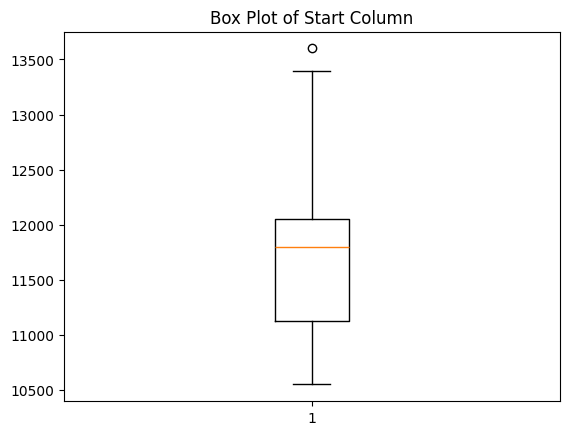

이상치:
           Date  Close  Start   High    Low  Volume
11  2018-06-15  13400  13600  13600  12900  201376


In [ ]:
# Q1_0116. Start 칼럼의 분포 및 이상치 여부를 탐색하는 Box Plot 및 이상치를 구하세요

import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv('주가데이터.csv')

# Box Plot 그리기
plt.boxplot(df['Start'])
plt.title('Box Plot of Start Column')
plt.show()

# 'Start' 열에 대한 사분위수 계산
Q1 = df['Start'].quantile(0.25)
Q3 = df['Start'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계값 설정
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치로 의심되는 관측치 필터링
outliers = df[(df['Start'] < lower_bound) | (df['Start'] > upper_bound)]

# 이상치 출력
print('이상치:\n', outliers)



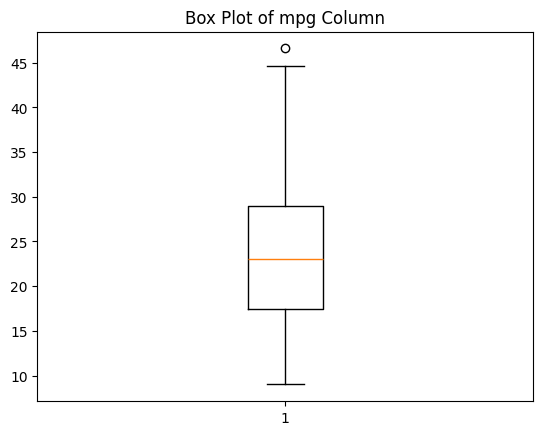

이상치 포함한 관측치:
       mpg  cylinders  displacement horsepower  weight  acceleration  \
322  46.6          4          86.0         65    2110          17.9   

     model year  origin   car name  
322          80       3  mazda glc  


In [5]:
# Q2_0116. mpg 칼럼의 이상치를 구하세요 (box plot, 이상치, 이상치 포함한 관측치)

import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
df_auto = pd.read_excel('auto-mpg.xlsx')

# Box Plot 그리기
plt.boxplot(df_auto['mpg'])
plt.title('Box Plot of mpg Column')
plt.show()

# 'mpg' 열에 대한 사분위수 계산
Q1 = df_auto['mpg'].quantile(0.25)
Q3 = df_auto['mpg'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계값 설정
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치로 의심되는 관측치 필터링
outliers = df_auto[(df_auto['mpg'] < lower_bound) | (df_auto['mpg'] > upper_bound)]

# 이상치 출력
print('이상치 포함한 관측치:\n', outliers)










In [2]:
import pandas as pd

fish_multi = pd.read_csv('4_fm2.csv')
fish_multi.head()

#이상치를 임의로 넣어 보기

fish_multi.iloc[5, 1] =10
fish_multi.iloc[10, 1] = 2
fish_multi.groupby('species').describe()

length                                           
         count mean       std  min   25%  50%   75%   max
species                                                  
A         10.0  4.6  2.221111  2.0  3.25  4.0  5.00  10.0
B         10.0  6.7  1.888562  2.0  6.25  7.0  7.75   9.0

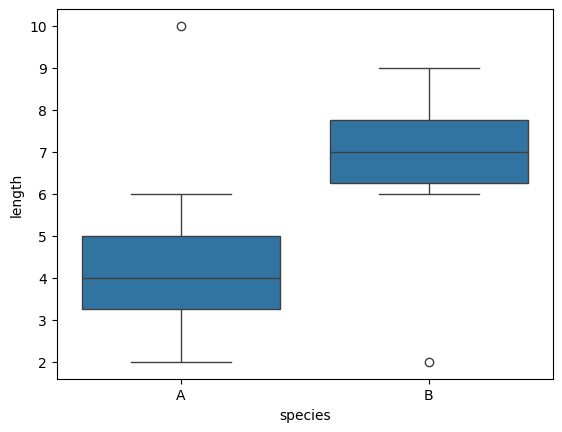

이상치 for species A:
  species  length
5       A      10

이상치 for species B:
   species  length
10       B       2



In [3]:
# Q3_0116. A, B 그룹의 Box Plot을 그리고 이상치를 구하세요

import seaborn as sns
import matplotlib.pyplot as plt

# Box Plot 그리기
sns.boxplot(x='species', y='length', data=fish_multi)
plt.show()

# 이상치 계산 및 출력
for species in fish_multi['species'].unique():
    group = fish_multi[fish_multi['species'] == species]
    Q1 = group['length'].quantile(0.25)
    Q3 = group['length'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = group[(group['length'] < lower_bound) | (group['length'] > upper_bound)]
    print(f"이상치 for species {species}:\n{outliers}\n")



<Figure size 1000x600 with 0 Axes>

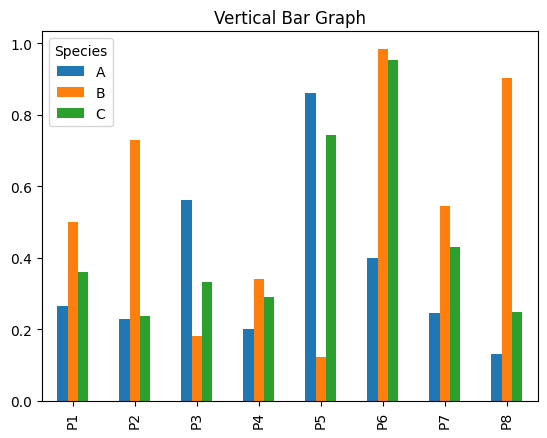

<Figure size 1000x600 with 0 Axes>

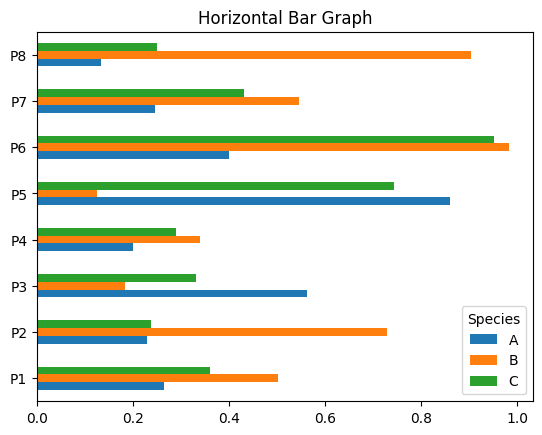

<Figure size 1000x600 with 0 Axes>

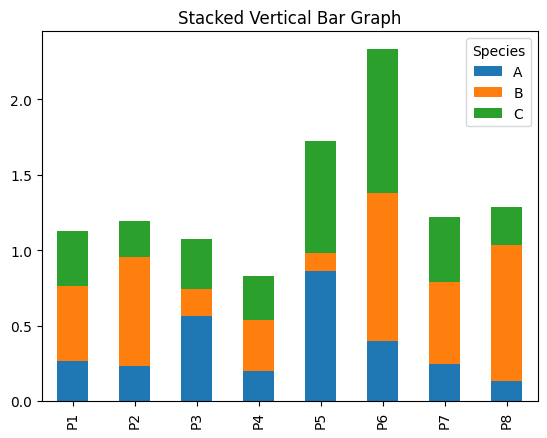

<Figure size 1000x600 with 0 Axes>

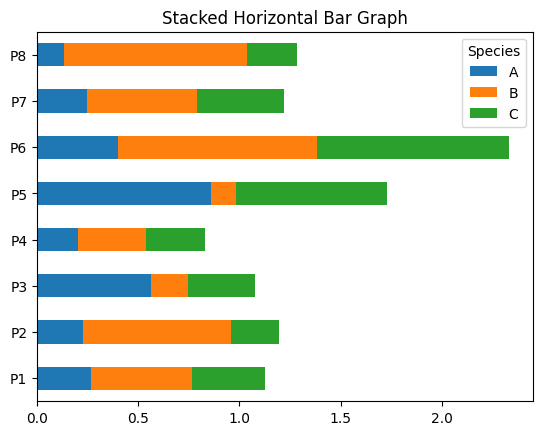

In [ ]:
# Q4_0116. 아래 df에 대하여 수직 막대그래프, 수평 막대그래프, 수직 스택 막대그래프, 수평 스택 막대그래프를 작성하세요

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터프레임 생성
df = pd.DataFrame(np.random.rand(8, 3),
                  index=['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8'],
                  columns=pd.Index(['A', 'B', 'C'], name='Species'))

# 수직 막대그래프
plt.figure(figsize=(10, 6))
df.plot(kind='bar')
plt.title('Vertical Bar Graph')
plt.show()

# 수평 막대그래프
plt.figure(figsize=(10, 6))
df.plot(kind='barh')
plt.title('Horizontal Bar Graph')
plt.show()

# 수직 스택 막대그래프
plt.figure(figsize=(10, 6))
df.plot(kind='bar', stacked=True)
plt.title('Stacked Vertical Bar Graph')
plt.show()

# 수평 스택 막대그래프
plt.figure(figsize=(10, 6))
df.plot(kind='barh', stacked=True)
plt.title('Stacked Horizontal Bar Graph')
plt.show()




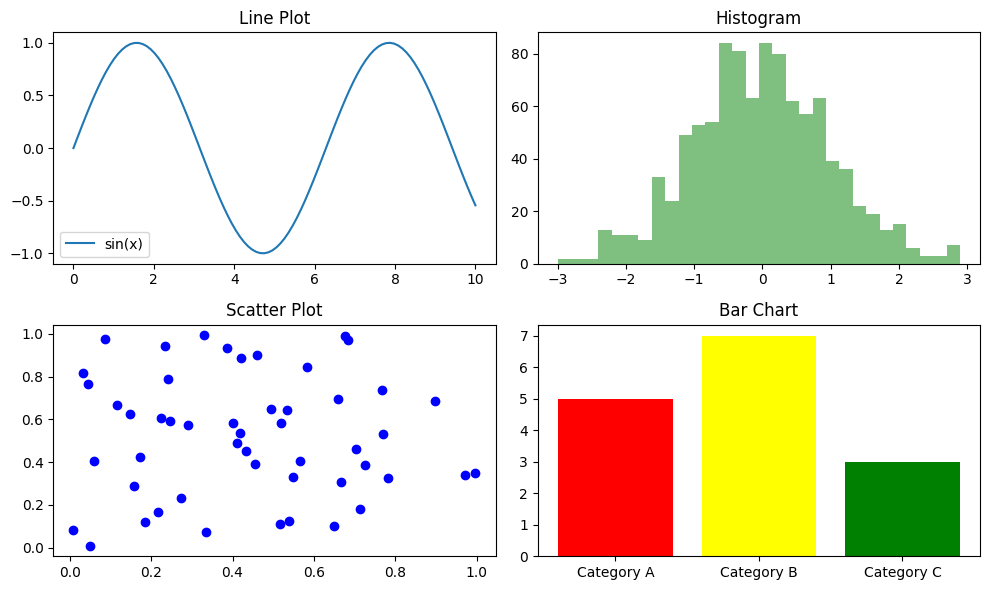

In [ ]:
#Q5_0116. 임의의 값으로 선그래프, 히스토그램, 산점도, 막대그래프 4개의 subplot으로 구성된 2x2 그래프를 작성하세요


import matplotlib.pyplot as plt
import numpy as np

# 2x2 그래프를 위한 기본 설정
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

# 선 그래프 데이터 생성 및 그리기
x = np.linspace(0, 10, 100)
y = np.sin(x)
axs[0, 0].plot(x, y, label='sin(x)')
axs[0, 0].set_title('Line Plot')
axs[0, 0].legend()

# 히스토그램 데이터 생성 및 그리기
data = np.random.randn(1000)
axs[0, 1].hist(data, bins=30, color='green', alpha=0.5)
axs[0, 1].set_title('Histogram')

# 산점도 데이터 생성 및 그리기
x_scatter = np.random.rand(50)
y_scatter = np.random.rand(50)
axs[1, 0].scatter(x_scatter, y_scatter, color='blue')
axs[1, 0].set_title('Scatter Plot')

# 막대 그래프 데이터 생성 및 그리기
bar_categories = ['Category A', 'Category B', 'Category C']
bar_values = [5, 7, 3]
axs[1, 1].bar(bar_categories, bar_values, color=['red', 'yellow', 'green'])
axs[1, 1].set_title('Bar Chart')

# 전체 그래프 레이아웃 조정
plt.tight_layout()
plt.show()


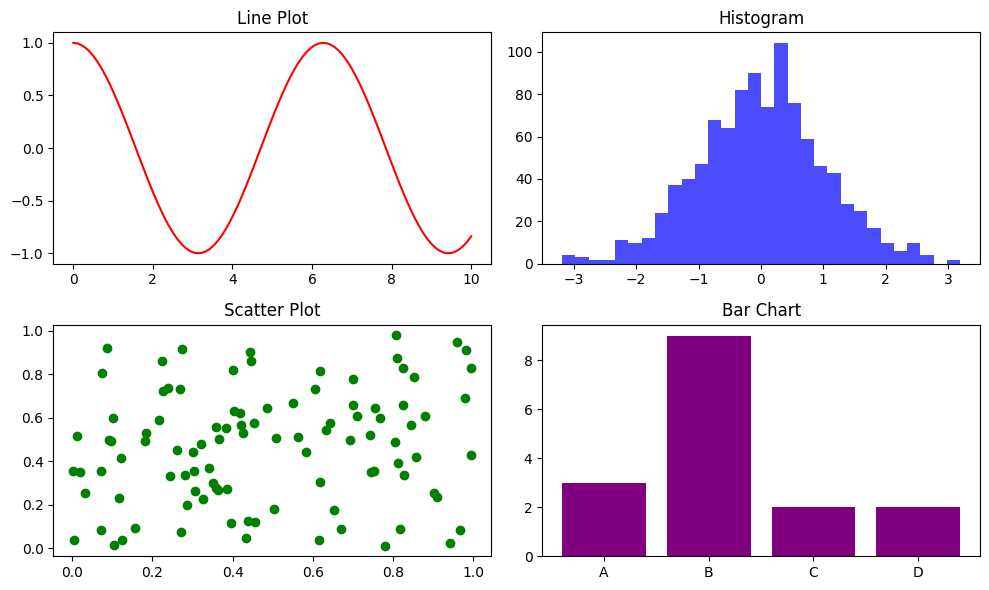

In [ ]:
# Q6_0116. 임의의 값으로 plt.subplots를 사용하여 선그래프, 히스토그램, 산점도, 막대그래프 4개의 subplot으로 구성된 2x2 그래프를 작성하세요.


# 2x2 그래프를 위한 기본 설정
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

# 선 그래프 데이터 생성 및 그리기
x_line = np.linspace(0, 10, 100)
y_line = np.cos(x_line)
axs[0, 0].plot(x_line, y_line, 'r-')
axs[0, 0].set_title('Line Plot')

# 히스토그램 데이터 생성 및 그리기
data_hist = np.random.normal(size=1000)
axs[0, 1].hist(data_hist, bins=30, color='blue', alpha=0.7)
axs[0, 1].set_title('Histogram')

# 산점도 데이터 생성 및 그리기
x_scatter = np.random.rand(100)
y_scatter = np.random.rand(100)
axs[1, 0].scatter(x_scatter, y_scatter, color='green')
axs[1, 0].set_title('Scatter Plot')

# 막대 그래프 데이터 생성 및 그리기
bar_categories = ['A', 'B', 'C', 'D']
bar_values = np.random.randint(1, 10, size=4)
axs[1, 1].bar(bar_categories, bar_values, color='purple')
axs[1, 1].set_title('Bar Chart')

# 전체 그래프 레이아웃 조정
plt.tight_layout()
plt.show()



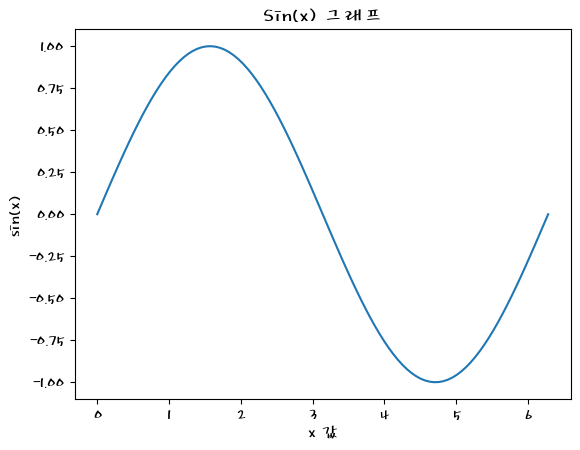

In [ ]:
# Q7_0116. 임의의 수치 데이터를 생성하고, 이를 이용해 sin(x)그래프를 그리세요
# x축과 y축에 적절한 레이블을 추가하세요
# 그래프에 제목을 추가하세요

import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
x = np.linspace(0, 2 * np.pi, 100)  # 0부터 2π까지의 값을 가지는 x
y = np.sin(x)  # sin(x) 계산

# 그래프 그리기
plt.plot(x, y)

# 축 레이블 추가
plt.xlabel('x 값')
plt.ylabel('sin(x)')

# 그래프 제목 추가
plt.title('Sin(x) 그래프')

# 그래프 표시
plt.show()


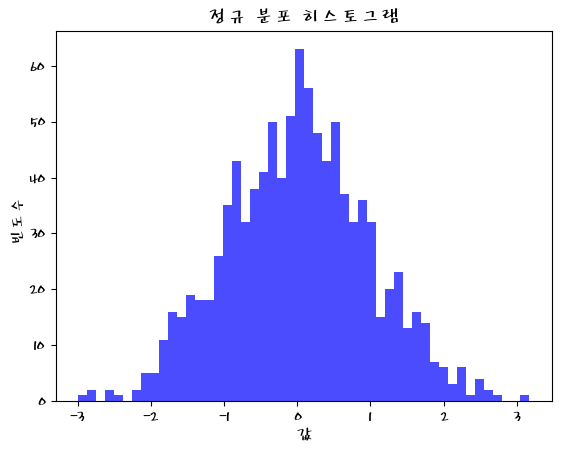

In [ ]:
#Q8_0116. 정규 분포를 따르는 임의의 데이터를 생성한 후 아래를 수행하세요
# 생성된 데이터를 사용하여 히스토그램을 그리세요
# 히스토그램의 빈(bin)수를 50으로 해보세요

# 정규 분포를 따르는 임의의 데이터 생성
data = np.random.randn(1000)

plt.hist(data, bins=50, color='blue', alpha=0.7)

plt.title('정규 분포 히스토그램')
plt.xlabel('값')
plt.ylabel('빈도수')

# 그래프 표시
plt.show()


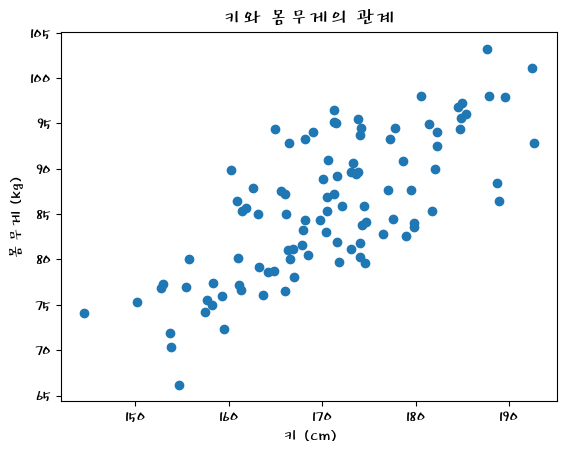

In [ ]:
#Q9_0116. 두개의 연관된 변수를 가지는 데이터셋을 생성 (예: 키와 몸무게) 한 후 아래를 수행하세요

# 이 데이터를 사용하여 산점도를 그리세요
# x축과 y축에 적절한 레이블과 제목을 추가하세요

# 연관된 변수인 키와 몸무게 데이터셋 생성
np.random.seed(0) 
height = np.random.normal(170, 10, 100)  # 평균 170cm, 표준편차 10cm인 키 데이터
weight = height * 0.5 + np.random.normal(0, 5, 100)  # 키와 어느 정도 연관된 몸무게 데이터

# 산점도 그리기
plt.scatter(height, weight)

# 축 레이블과 제목 추가
plt.xlabel('키 (cm)')
plt.ylabel('몸무게 (kg)')
plt.title('키와 몸무게의 관계')

# 그래프 표시
plt.show()






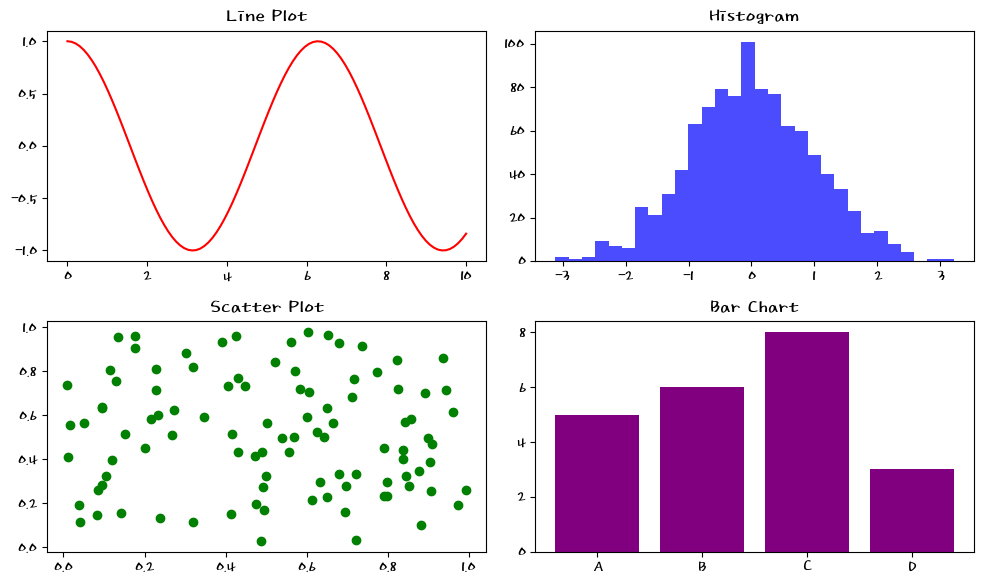

In [ ]:
# Q10_0116. 여러 개의 서로 다른 데이터셋을 생성한 후 이 데이터셋을 사용하여 하나의 창에 여러 개의 서브플롯의 다른 유형 그래프를 그려보세요
# (선 그래프, 막대그래프, 산점도, 히스토그램)

# 2x2 그래프를 위한 기본 설정
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

# 선 그래프 데이터 생성 및 그리기
x_line = np.linspace(0, 10, 100)
y_line = np.cos(x_line)
axs[0, 0].plot(x_line, y_line, 'r-')
axs[0, 0].set_title('Line Plot')

# 막대 그래프 데이터 생성 및 그리기
bar_categories = ['A', 'B', 'C', 'D']
bar_values = np.random.randint(1, 10, size=4)
axs[1, 1].bar(bar_categories, bar_values, color='purple')
axs[1, 1].set_title('Bar Chart')



# 산점도 데이터 생성 및 그리기
x_scatter = np.random.rand(100)
y_scatter = np.random.rand(100)
axs[1, 0].scatter(x_scatter, y_scatter, color='green')
axs[1, 0].set_title('Scatter Plot')

# 히스토그램 데이터 생성 및 그리기
data_hist = np.random.normal(size=1000)
axs[0, 1].hist(data_hist, bins=30, color='blue', alpha=0.7)
axs[0, 1].set_title('Histogram')


# 전체 그래프 레이아웃 조정
plt.tight_layout()
plt.show()